In [1]:
#Importing Essential Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
#Extracting Data into storeData
storeData = pd.read_csv('Stores.csv')
storeData.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [3]:
# Data type and dimensions
print('Data Type: ', type(storeData))
print('Data Dimensions: ', storeData.shape)

Data Type:  <class 'pandas.core.frame.DataFrame'>
Data Dimensions:  (896, 5)


In [4]:
# Data types of the different variables
storeData.dtypes

Store ID                int64
Store_Area              int64
Items_Available         int64
Daily_Customer_Count    int64
Store_Sales             int64
dtype: object

In [10]:
# Extracting only the relevant variables
Store1Data = pd.DataFrame(storeData[['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']])
Store1Data.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [11]:
# The different values for the various variables
Store1Data.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


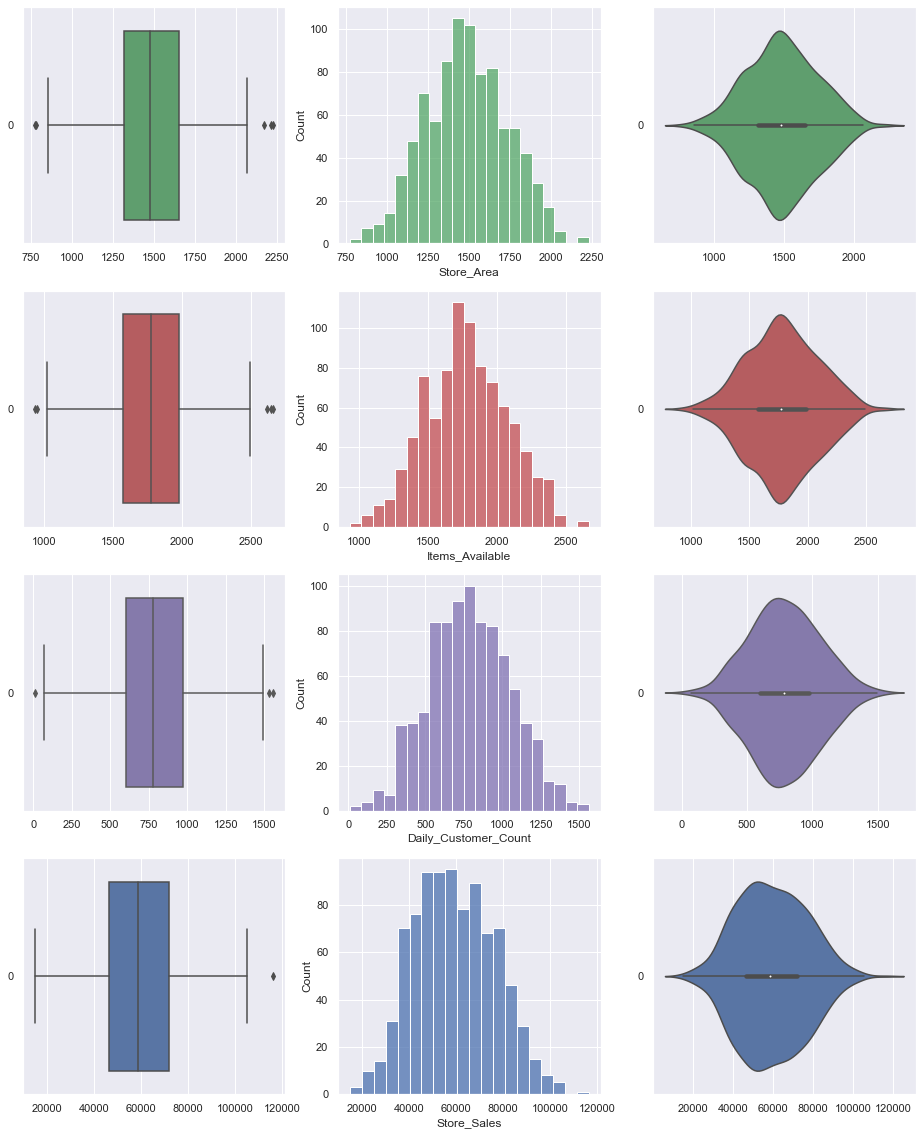

In [12]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(16, 20))
colors = ["g", "r", "m", "b",]

count = 0
for var in Store1Data:
    sb.boxplot(data=Store1Data[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data=Store1Data[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(data=Store1Data[var], orient = "h", color = colors[count], ax = axes[count,2])
    count += 1

                      Store_Area  Items_Available  Daily_Customer_Count  \
Store_Area              1.000000         0.998891             -0.041423   
Items_Available         0.998891         1.000000             -0.040978   
Daily_Customer_Count   -0.041423        -0.040978              1.000000   
Store_Sales             0.097474         0.098849              0.008629   

                      Store_Sales  
Store_Area               0.097474  
Items_Available          0.098849  
Daily_Customer_Count     0.008629  
Store_Sales              1.000000  


<AxesSubplot:>

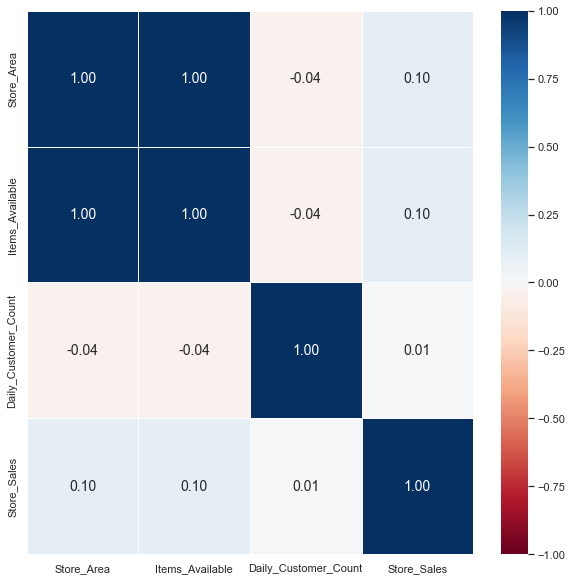

In [13]:
# Correlation Matrix
print(Store1Data.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(Store1Data.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

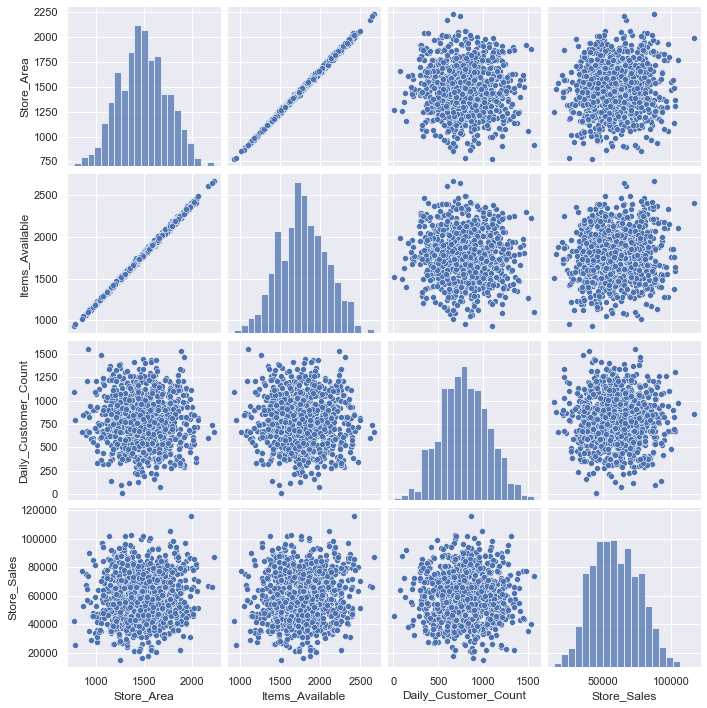

In [14]:
# Pariplots of the various variables
sb.pairplot(data = Store1Data)

# Question
Can cutting down on store area to save on too many products affect the sales of the store?

In [15]:
#Extracting the relevant data
storeArea = pd.DataFrame(storeData['Store_Area'])
storeSales = pd.DataFrame(storeData['Store_Sales'])

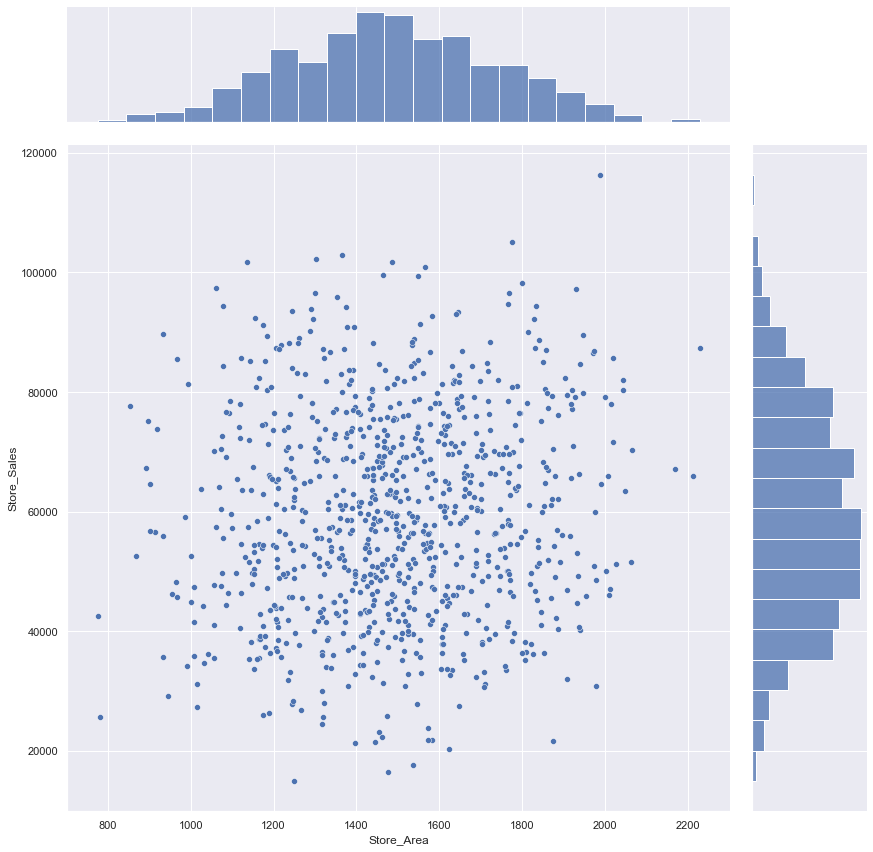

In [16]:
# Joinplot of Sales against Radio
sb.jointplot(data=storeData, x = 'Store_Area', y = 'Store_Sales', height = 12)

In [19]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a Linear Regression object
linregSalesVsArea = LinearRegression()

In [20]:
# Split the Dataset into Train and Test
storeArea_train, storeArea_test, storeSales_train, storeSales_test = train_test_split(storeArea, storeSales, test_size = 224/896)

# Check the sample sizes
print("Train Set :", storeArea_train.shape, storeSales_train.shape)
print("Test Set  :", storeArea_test.shape, storeSales_test.shape)

Train Set : (672, 1) (672, 1)
Test Set  : (224, 1) (224, 1)


Coefficients 	: a =  [[6.18547448]]
Intercept 	: b =  [50290.81538418]


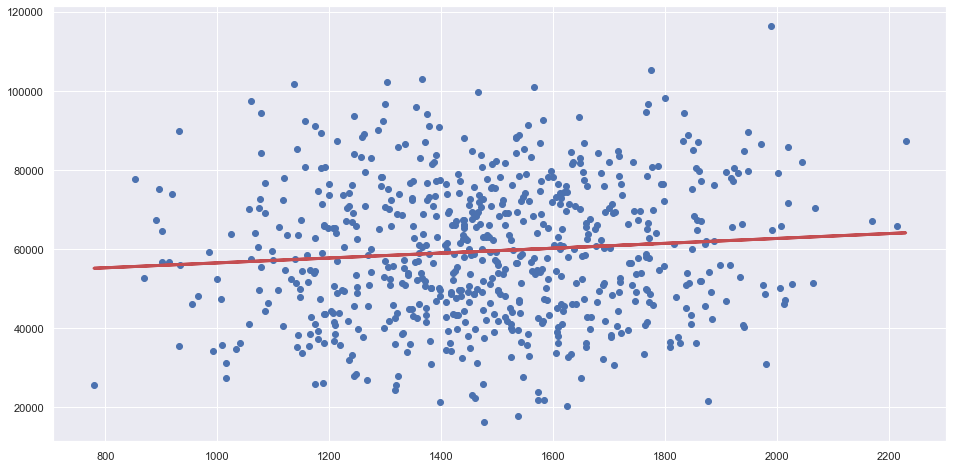

In [21]:
# Sales train against Area train
# b intercept value and a coefficient value
linregSalesVsArea.fit(storeArea_train, storeSales_train)
print('Coefficients \t: a = ', linregSalesVsArea.coef_)
print('Intercept \t: b = ', linregSalesVsArea.intercept_)

# Formula for the Regression line
regline_x1 = storeArea_train.to_numpy()
regline_y1 = linregSalesVsArea.intercept_ + linregSalesVsArea.coef_ * regline_x1

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(storeArea_train, storeSales_train)
plt.plot(regline_x1, regline_y1, "r-", linewidth = 3)
plt.show()

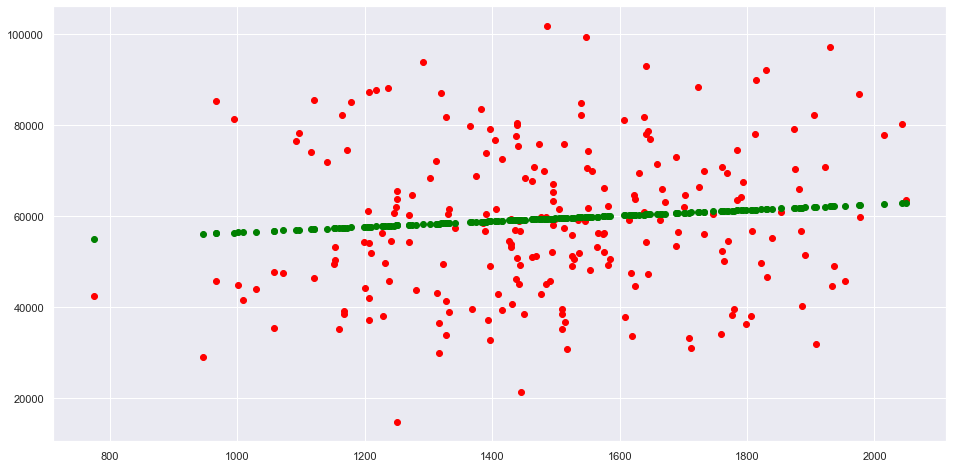

Explained Variance (R^2) on Train Set 	: 0.00793598354673486
Explained Variance (R^2) on Test Set 	: 0.013671741666559711
Mean Squared Error (MSE) 	: 3664894005.566964


In [23]:
# Predicting Sales with Area
storeSales_test_pred = linregSalesVsArea.predict(storeArea_test)
# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(storeArea_test, storeSales_test, color = "red")
plt.scatter(storeArea_test, storeSales_test_pred, color = "green")
plt.show()

print("Explained Variance (R^2) on Train Set \t:", linregSalesVsArea.score(storeArea_train, storeSales_train))
print("Explained Variance (R^2) on Test Set \t:", linregSalesVsArea.score(storeArea_test, storeSales_test))

def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(storeArea_train, storeSales_train)
print("Mean Squared Error (MSE) \t:", mse)